## Dataset Loading and Preparation for Decision Trees

**Implementation Approach:**
I loaded the Iris dataset using pandas to read the CSV file and prepared it for classification analysis. My approach involved importing essential libraries, examining the dataset structure, identifying the target variable, and splitting the data into training and test sets.

In [4]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

print("Libraries imported successfully!")

# Loading the dataset
df = pd.read_csv('iris.csv')
print("Loaded iris.csv successfully!")

# Check data dimensions and types
print(f"Dataset dimensions: {df.shape}")
print(f"Data types:")
print(df.dtypes)

# Examine potential label columns
print("First few rows:")
print(df.head())
print(f"\nPotential label column: {df.columns[-1]}")
print(f"Unique values in label: {df[df.columns[-1]].unique()}")

# Prepare features and target variable
X = df.drop('variety', axis=1)
y = df['variety']

# Split data into training and test sets (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"Features: {X.columns.tolist()}")

Libraries imported successfully!
Loaded iris.csv successfully!
Dataset dimensions: (150, 5)
Data types:
sepal.length    float64
sepal.width     float64
petal.length    float64
petal.width     float64
variety          object
dtype: object
First few rows:
   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa

Potential label column: variety
Unique values in label: ['Setosa' 'Versicolor' 'Virginica']
Training set: 120 samples
Test set: 30 samples
Features: ['sepal.length', 'sepal.width', 'petal.length', 'petal.width']


### Train/test a decision tree on labelled dataset

**Implementation Approach:**
Building a decision tree classifier and evaluating its performance on the test set.

In [16]:
# Creating and training decision tree 
dt_classifier = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)
dt_classifier.fit(X_train, y_train)

# Printing decision tree stuffs
print("Decision tree trained successfully!")
print(f"Tree Parameters - Max Depth: {dt_classifier.max_depth}")
print(f"Min Samples Split: {dt_classifier.min_samples_split}")
print(f"Min Samples Leaf: {dt_classifier.min_samples_leaf}")

Decision tree trained successfully!
Tree Parameters - Max Depth: 5
Min Samples Split: 10
Min Samples Leaf: 5


### Visualize the tree and compute accuracy

**Implementation Approach:**
Visualizing the decision tree structure to understand the decision-making process.

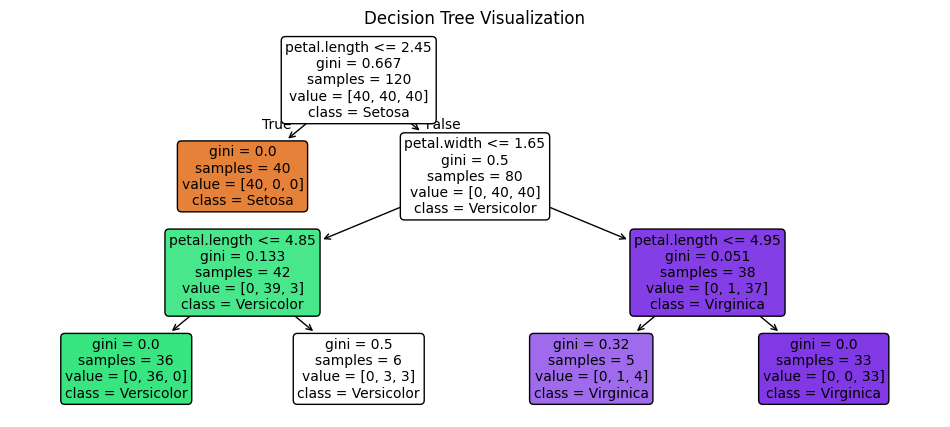

Decision Tree Accuracy: 0.9333
Tree depth: 3


In [20]:
# Making predictions
y_pred_dt = dt_classifier.predict(X_test)

# Visualize the decision tree
plt.figure(figsize=(12, 5))
plot_tree(dt_classifier, feature_names=X.columns, class_names=dt_classifier.classes_, 
          filled=True, rounded=True, fontsize=10)
plt.title('Decision Tree Visualization')
plt.show()

# Calculating accuracy
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")
print(f"Tree depth: {dt_classifier.get_depth()}")

### Use K-Fold Cross-Validation (K=5)

**Implementation Approach:**
Implementing K-Fold cross-validation with K=5 to get more robust performance estimates by partitioning the data into 5 folds.

In [33]:
# Performing K-Fold cross-validation with K=5
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

cv_scores_dt = cross_val_score(dt_classifier, X_train, y_train, cv=kfold)

print("Decision Tree K-Fold Cross-validation (K=5) scores:")
print(f"Scores: {cv_scores_dt}")
print(f"Mean: {cv_scores_dt.mean():.4f}")
print(f"Standard deviation: {cv_scores_dt.std():.4f}")
print(f"Number of folds: {kfold.n_splits}")

Decision Tree K-Fold Cross-validation (K=5) scores:
Scores: [0.95833333 0.875      0.91666667 0.95833333 0.875     ]
Mean: 0.9167
Standard deviation: 0.0373
Number of folds: 5


### Use Naïve Bayes to classify text (adapted for numerical data)

**Implementation Approach:**
Applying Gaussian Naïve Bayes classifier to the iris dataset for classification.

In [36]:
# Creating and training Naïve Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Making predictions
y_pred_nb = nb_classifier.predict(X_test)

# Calculating accuracy
nb_accuracy = accuracy_score(y_test, y_pred_nb)
print("Naïve Bayes trained successfully!")
print(f"Naïve Bayes Accuracy: {nb_accuracy:.4f}")

Naïve Bayes trained successfully!
Naïve Bayes Accuracy: 0.9667


### Analyze confusion matrix, precision, recall

**Implementation Approach:**
Creating confusion matrices and calculating precision and recall for both models.

In [37]:
# Confusion matrix for Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)
print("Decision Tree Confusion Matrix:")
print(cm_dt)

# Confusion matrix for Naïve Bayes
cm_nb = confusion_matrix(y_test, y_pred_nb)
print("\nNaïve Bayes Confusion Matrix:")
print(cm_nb)

# Calculating precision and recall
dt_precision = precision_score(y_test, y_pred_dt, average='weighted')
dt_recall = recall_score(y_test, y_pred_dt, average='weighted')

nb_precision = precision_score(y_test, y_pred_nb, average='weighted')
nb_recall = recall_score(y_test, y_pred_nb, average='weighted')

print(f"\nDecision Tree - Precision: {dt_precision:.4f}, Recall: {dt_recall:.4f}")
print(f"Naïve Bayes - Precision: {nb_precision:.4f}, Recall: {nb_recall:.4f}")

Decision Tree Confusion Matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]

Naïve Bayes Confusion Matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]

Decision Tree - Precision: 0.9333, Recall: 0.9333
Naïve Bayes - Precision: 0.9697, Recall: 0.9667


### Apply Laplace smoothing

**Implementation Approach:**
For Gaussian Naïve Bayes, I will demonstrate the concept by adding a small smoothing parameter.

In [38]:
# Applying smoothing to Naïve Bayes
nb_smoothed = GaussianNB(var_smoothing=1e-5)  # Smaller smoothing
nb_smoothed.fit(X_train, y_train)
y_pred_nb_smoothed = nb_smoothed.predict(X_test)

nb_smoothed_accuracy = accuracy_score(y_test, y_pred_nb_smoothed)
print(f"Naïve Bayes with smoothing Accuracy: {nb_smoothed_accuracy:.4f}")

# Comparing with original
print(f"Original Naïve Bayes: {nb_accuracy:.4f}")
print(f"Smoothed Naïve Bayes: {nb_smoothed_accuracy:.4f}")

Naïve Bayes with smoothing Accuracy: 0.9667
Original Naïve Bayes: 0.9667
Smoothed Naïve Bayes: 0.9667


### Final Comparison and Results

**Implementation Approach:**
Comparing the performance of both classifiers.

In [11]:
# Final comparison
print("=" * 50)
print("FINAL RESULTS COMPARISON")
print("=" * 50)
print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")
print(f"Naïve Bayes Accuracy: {nb_accuracy:.4f}")
print(f"Naïve Bayes (Smoothed) Accuracy: {nb_smoothed_accuracy:.4f}")

print(f"\nDecision Tree CV Mean: {cv_scores_dt.mean():.4f}")

# Cross-validation for Naïve Bayes
cv_scores_nb = cross_val_score(nb_classifier, X_train, y_train, cv=5)
print(f"Naïve Bayes CV Mean: {cv_scores_nb.mean():.4f}")

FINAL RESULTS COMPARISON
Decision Tree Accuracy: 0.9333
Naïve Bayes Accuracy: 0.9667
Naïve Bayes (Smoothed) Accuracy: 0.9667

Decision Tree CV Mean: 0.9167
Naïve Bayes CV Mean: 0.9583
Naïve Bayes CV Mean: 0.9583
